## Practical 2
Here, I implemented Naive Bayes from scratch and compared it with Logistic regression.
The goal was to see that distriminative models, such as logistic regression behave better than generative models, such as Naive Bayes. The conclusion is that the statement is true, but when given enough data, otherwise, Naive Bayes converge faster, meaning with less data given, but the accuracy obtained is lower than the one of logistic regression.

In [56]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [72]:
class NBC:
    def __init__(self, feature_types, num_classes):
        self.feature_types = feature_types
        self.num_classes = num_classes
        self.p_classes = np.zeros(num_classes)
        self.param = np.zeros((2, len(feature_types), num_classes))
        # 1st param in case type is b - this is p(feature=0), in case r - this is mean of Gaussian
        # 2nd param in case type is b - this is p(feature=1), in case r - this is std of Gaussian
    
    def fit(self, X, y):
        data = [np.array([np.array(X[j]) for j in range(len(y)) if y[j]==i]) for i in range(self.num_classes)]
        for i in range(len(self.feature_types)):
            if self.feature_types[i] == 'b':
                self.param[1, i] = np.array([(data[j][:, i].sum()+1)/(len(data[j][:, i])+2) for j in range(self.num_classes)])
                self.param[0, i] = 1 - self.param[1, i]
                
            if self.feature_types[i] == 'r':
                self.param[0, i] = np.array([(data[j][:, i]).mean() for j in range(self.num_classes)])
                self.param[1, i] = np.array([max(1e-5, data[j][:, i].std()) for j in range(self.num_classes)])
            
            
    
    def predict(self, X):
        class_pred = np.zeros((len(X), self.num_classes))
        for i in range(len(self.feature_types)):
            if self.feature_types[i] == 'b':
                class_pred += np.log(np.array([self.param[int(x[i]), i] for x in X]))
            if self.feature_types[i] == 'r':
                class_pred += (np.array([[norm.logpdf(x[i], self.param[0,i,j], self.param[1, i, j]) for j in range(self.num_classes)] for x in X]))
        return class_pred.argmax(axis=1)

In [64]:
from sklearn.linear_model import LogisticRegression

# Handin 1
print("If we want lambda(regularisation parameter) to be 0.1, we need C=10")

If we want lambda(regularisation parameter) to be 0.1, we need C=10


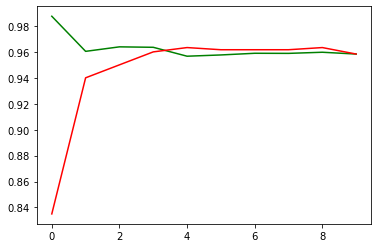

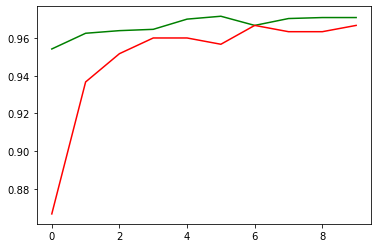

In [75]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris['data'], iris['target']

g_train_err = np.zeros(10)
g_test_err = np.zeros(10)
d_train_err = np.zeros(10)
d_test_err = np.zeros(10)

for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    for i in range(10):
        # Naive Bayes classifier
        nbc = NBC(feature_types=['r', 'r', 'r', 'r'], num_classes=3)
        nbc.fit(X_train[:(i+1)*len(X_train)//10], y_train[:(i+1)*len(X_train)//10])
        
        y_pred_train = nbc.predict(X_train[:(i+1)*len(X_train)//10])
        y_pred_test = nbc.predict(X_test)
        
        g_train_err[i] += accuracy_score(y_train[:(i+1)*len(X_train)//10], y_pred_train)
        g_test_err[i] += accuracy_score(y_test, y_pred_test)
        
        # Logistic Regression classifier
        lr = LogisticRegression(max_iter=1000)
        lr.fit(X_train[:(i+1)*len(X_train)//10], y_train[:(i+1)*len(X_train)//10])
        
        y_pred_train = lr.predict(X_train[:(i+1)*len(X_train)//10])
        y_pred_test = lr.predict(X_test)
        
        d_train_err[i] += accuracy_score(y_train[:(i+1)*len(X_train)//10], y_pred_train)
        d_test_err[i] += accuracy_score(y_test, y_pred_test)
        
g_train_err /= 20
g_test_err /= 20
d_train_err /= 20
d_test_err /= 20

# Handin 2

plt.plot(g_train_err, c='g')
plt.plot(g_test_err, c='r')
plt.show()
plt.plot(d_train_err, c='g')
plt.plot(d_test_err, c='r')
plt.show()

In [70]:
import pickle as cp
import numpy as np
X, y = cp.load(open('voting.pickle', 'rb'))
len(X[0])

16

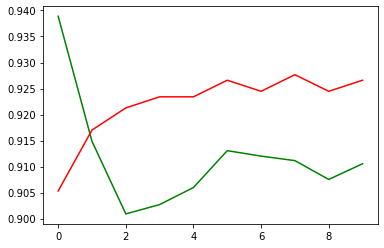

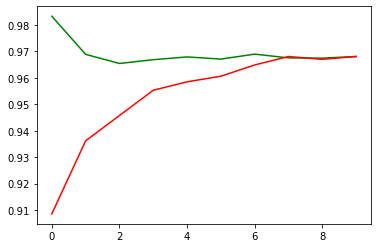

In [73]:
g_train_err = np.zeros(10)
g_test_err = np.zeros(10)
d_train_err = np.zeros(10)
d_test_err = np.zeros(10)

for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    for i in range(10):
        # Naive Bayes classifier
        nbc = NBC(feature_types=['b']*16, num_classes=2)
        nbc.fit(X_train[:(i+1)*len(X_train)//10], y_train[:(i+1)*len(X_train)//10])
        
        y_pred_train = nbc.predict(X_train[:(i+1)*len(X_train)//10])
        y_pred_test = nbc.predict(X_test)
        
        g_train_err[i] += accuracy_score(y_train[:(i+1)*len(X_train)//10], y_pred_train)
        g_test_err[i] += accuracy_score(y_test, y_pred_test)
        
        # Logistic Regression classifier
        lr = LogisticRegression(max_iter=1000)
        lr.fit(X_train[:(i+1)*len(X_train)//10], y_train[:(i+1)*len(X_train)//10])
        
        y_pred_train = lr.predict(X_train[:(i+1)*len(X_train)//10])
        y_pred_test = lr.predict(X_test)
        
        d_train_err[i] += accuracy_score(y_train[:(i+1)*len(X_train)//10], y_pred_train)
        d_test_err[i] += accuracy_score(y_test, y_pred_test)
        
g_train_err /= 20
g_test_err /= 20
d_train_err /= 20
d_test_err /= 20

# Handin Optional 2

plt.plot(g_train_err, c='g')
plt.plot(g_test_err, c='r')
plt.show()
plt.plot(d_train_err, c='g')
plt.plot(d_test_err, c='r')
plt.show()